In [ ]:
import pandas as pd

# data = pd.read_csv('/content/drive/MyDrive/Css/state_entities_unf.csv')
data = pd.read_csv('/content/drive/MyDrive/Css/entities_unf.csv')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(df, column_name, language='english'):
    stop_words = set(stopwords.words(language))
    df[column_name] = df[column_name].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df1 = remove_stopwords(data, 'transcripts')

In [ ]:
trctp = data['transcripts']
alt_script = []
for tcpt in trctp:
  tcpt = tcpt.replace('\n', ' ')
  tcpt = tcpt.lower()
  alt_script.append(tcpt)

In [ ]:
Indian_politics = ['bjp', 'narendra', 'modi', 'union', 'nda', 'election','rss',
                   'hindu','muslim', 'schemes','kashmir','370','j&k', 'income','tax', 'ed',
                   'enforcement', 'directorate', 'citizenship','mandir','temple','ram', 'nitin', 'gadkari','ashwini' , 'vaishnav' ,
                   'railway','nirmala', 'sitharaman', 'congress', 'upa', 'aap', 'gandhi',"gandhi's", 'priyanka', 'yatra','samajwadi',
                   'rahul', 'sonia','opposition', 'i.n.d.i.a','left','communist',"joomla's",'tmc','mamta',
                   'citizenship', 'questioned']
NDA_dict = ['bjp', 'narendra', 'modi', 'pm', 'prime', 'minister', 'union', 'finance', 'central', 'forces','indian',
            'government','defense', 'nda', 'election','rss','religion','hindu','muslim', 'schemes','allah','pakistan',
            'pakistani','terror','terrorist','kashmir','370','j&k', 'income','tax', 'ed', 'enforcement', 'directorate',
            'citizenship','amendment','mandir','temple','ram', 'nitin', 'gadkari', 'economy', 'ashwini' , 'vaishnav' ,'railway',
            'external',  'affairs', 'nirmala', 'sitharaman']
INDIA_dict = ['congress', 'upa', 'aap', 'gandhi',"gandhi's", 'priyanka', 'yatra','samajwadi','rahul', 'sonia','opposition',
              'i.n.d.i.a','india','left','communist',"joomla's",'tmc','mamta','citizenship','amendment', 'questioned', 'rjd']
support = ['magnificent', 'brilliant', 'curroption','effort','hopeful','capitalize','innovative','secretary','inaugurating',
           'boost']
critic = ['inflation', 'unemployment', 'farmers', 'waste', 'curropt', 'issues', 'public','backlash','anger','issue','problem',
          'probe','wrong','villain', 'questioned']

In [ ]:
import numpy as np

score_array = []
for script in alt_script:
  words = script.split(' ')
  x1 = 0
  x2 = 0
  x3 = 0
  x4 = 0
  x5 = 0
  for word in words:
    if word in NDA_dict:
      x1 = x1 + 1
    elif word in INDIA_dict:
      x2 = x2 + 1
    elif word in support:
      x3 = x3 + 1
    elif word in critic:
      x4 = x4 + 1
    else:
      x5 = x5 + 1
  #print(x1,x2,x3,x4,x5)
  score = round((np.log(((x1*x3 + x5)/(x2* x4 + x5))*((x1*x4 + x5)/(x2* x3 + x5)))),3)
  score_array.append(score)

In [ ]:
import numpy as np

def score_calc(text):
  word_store = {}
  words = text.split(' ')
  x1 = 0
  x2 = 0
  x3 = 0
  x4 = 0
  x5 = 0
  for word in words:
    if word in NDA_dict:
      if word in word_store:
            word_store[word] += 1
      else:
            word_store[word] = 1
      x1 = x1 + 1
    elif word in INDIA_dict:
      if word in word_store:
            word_store[word] += 1
      else:
            word_store[word] = 1
      x2 = x2 + 1
    elif word in support:
      x3 = x3 + 1
    elif word in critic:
      x4 = x4 + 1
    else:
      x5 = x5 + 1
  key_word_count = [x1, x2, x3, x4, x5]
  score = round((np.log(((x1*x3 + x5)/(x2* x4 + x5))*((x1*x4 + x5)/(x2* x3 + x5)))),3)
  return score, key_word_count, word_store

In [ ]:
test = alt_script[112]
test

"[music] [music] you are the loveliness that came to i invited you are the amnesty that pardon me the spire when bought needs a break he comes to pondicherry english thinking but i mean we just want to what the people who is ready to control the water [music] [music] good morning and welcome as i am taking my first lesson on this surfing boat trying to balance myself we have reached puducherry from chennai [music] okay that was my first lesson at surfing at least i gave it a short always wanted to do and it's all thanks to some i from the cali li surfing school here in puducherry and you've been here for a very very long time 24 years so what is it that you'd really like about puducherry surfing it it was a great time thank you so much good evening and welcome where else where else in the country would you get the amalgamation the melting point of so many cultures but voodoo cherry yes i'm in the state of puerto cherry it's only one lok sabha seat though and it goes to pole in the seco

In [ ]:
labels = []
for script in alt_script:
  sc = score_calc(script)
  if sc[0] > 0.01:
    labels.append('ProGov')
  elif sc[0] < -0.01:
    labels.append('AntiGov')
  else:
    labels.append('Neutral')

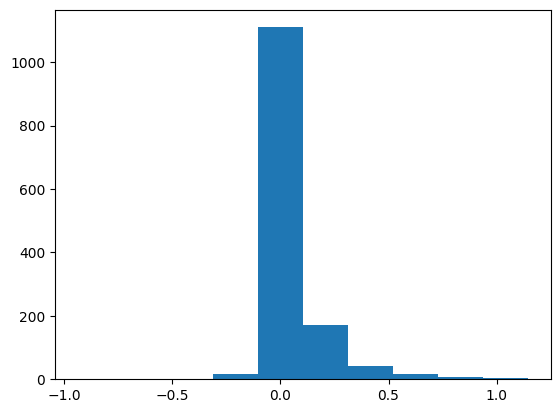

In [ ]:
import matplotlib.pyplot as plt

plt.hist(score_array)
plt.show()

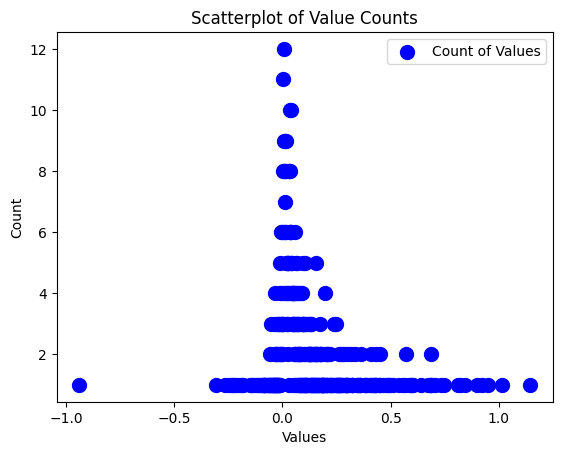

In [ ]:
value_counts = {}
for value in score_array:
  if value != 0:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Extract values and counts from the dictionary
values = list(value_counts.keys())
counts = list(value_counts.values())

# Create a scatterplot
plt.scatter(values, counts, marker='o', s=100, c='b', label='Count of Values')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Scatterplot of Value Counts')
plt.legend()
# Show the plot
plt.show()

In [ ]:
pro = 0
anti = 0
neut = 0

for score in score_array:
  if score > 0.01:
    pro = pro + 1
  elif score < -0.01:
    anti = anti + 1
  else:
    neut = neut + 1

print(pro,anti,neut)

576 90 702


In [ ]:
len(labels)

1368

In [ ]:
labels = pd.Series(labels, name = 'Label')

In [ ]:
dataframe = df1.merge(labels, left_index=True, right_index=True)

In [ ]:
dataframe.head()

In [ ]:
dataframe.to_csv('National_Labelled_transcript.csv')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(nlp.vocab)

In [ ]:
phrases = ['machine learning', 'robots', 'intelligent agents']

patterns = [nlp(text) for text in phrases]

In [ ]:
phrase_matcher.add('Politics', None, *patterns)

In [ ]:
articles = data['transcripts']

In [ ]:
article_112 = alt_script[915]
article_112

"i know it's raining dudes in the saudi crown prince is taught to china after his visits to pakistan and india mohammed bin salman is in beijing and the visit seems to have achieved its objectives and that is strengthening ties with china and saudi crown prince mohammed bin salman and chinese president xi jinping have decided to revive strategic partnership between the two countries china promised to support saudis drive for economic diversification and social reform besides that she said that china will oppose any interference in saudi arabia's internal affairs commons come against the backdrop of the murder of journalist jamal keshavjee which led to international pressure on saudi arabia xi jinping's comments could also prove ties between china and saudi arabia which suffered due to beijing steals ties with the ha ha madam salman expressed gratitude for china's support to saudi arabia's reform the crown prince also played to the gallery by supporting one china policy the comment coul

In [ ]:
def ref_calc(text):
  words = text.split(' ')
  x1 = 0
  x2 = 0
  x3 = 0
  x4 = 0
  x5 = 0
  for word in words:
    if word in NDA_dict:
      x1 = x1 + 1
    elif word in INDIA_dict:
      x2 = x2 + 1
    elif word in support:
      x3 = x3 + 1
    elif word in critic:
      x4 = x4 + 1
    elif word in Indian_politics:
      x5 = x5 + 1
  key_word_count = [x1, x2, x3, x4, x5]
  return key_word_count

In [ ]:
ans = ref_calc(article_112)
ans

[2, 1, 0, 1, 0]

In [ ]:
index_holder = []
for script in alt_script:
  get_key = ref_calc(script)
  if get_key[4] == 0 and (get_key[0]== 0 and get_key[1] == 0):
    index = alt_script.index(script)
    index_holder.append(index)
print(len(index_holder))

104


In [ ]:
for no in index_holder:
  try:
    dataframe = dataframe.drop(no)
  except Exception as e:
    pass


In [ ]:
(dataframe.head())

,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities,Label
0,joLk0IPEniA,WILL RAFALE BE A FACTOR THIS ELECTION? | FACEO...,"RafaleTwist DAY BEFORE POLLS, RAFALE BLOW TO G...",2019-04-10T16:41:10Z,CNN-News18,https://i.ytimg.com/vi/joLk0IPEniA/hqdefault.jpg,unanimously rejected government's contention o...,True,en,470,8,5.0,unanimously reject government \n contention ...,Hindu -> NORP\ntoday -> DATE\nSupreme Court ->...,ProGov
1,Gc1tf5U7BuU,BJP Manifesto Promises To Secure &amp; Protect...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-08T14:19:22Z,CNN-News18,https://i.ytimg.com/vi/Gc1tf5U7BuU/hqdefault.jpg,top story 18 degrees south BJP released manife...,True,en,285,2,9.0,story 18 degree south \n BJP release manifes...,18 -> CARDINAL\nBJP -> ORG\ntoday -> DATE\nsha...,ProGov
2,1BAgeFCwR3o,Reporters Project: Andhra Pradesh’s Politics O...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:22:24Z,CNN-News18,https://i.ytimg.com/vi/1BAgeFCwR3o/hqdefault.jpg,[Music] reporters project CNN news 18 reporter...,True,en,1431,3,11.0,reporter project CNN news 18 \n reporter fan...,CNN -> ORG\n18 -> CARDINAL\nApril 11th -> DATE...,ProGov
3,HKCBxHhnfC4,Reporters Project: Giving Voice To The Real Is...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:20:19Z,CNN-News18,https://i.ytimg.com/vi/HKCBxHhnfC4/hqdefault.jpg,[Music] reporters project record stories CNN n...,True,en,146,2,2.0,reporter project \n record story CNN news 18...,CNN news -> ORG\n18 -> CARDINAL\nPakistan -> G...,AntiGov
4,iLlUz3a4zDg,“I Definitely Don&#39;t Fight A War To Lose” –...,On Off Centre Anuradha SenGupta is talking to ...,2019-04-06T10:28:52Z,CNN-News18,https://i.ytimg.com/vi/iLlUz3a4zDg/hqdefault.jpg,[Music] film stars stranger electoral politics...,True,en,16396,130,205.0,film star stranger electoral \n politic Lok ...,Lok Sabha -> ORG\nyear -> DATE\nLok Sabha -> O...,Neutral


In [ ]:
dataframe.to_csv('Filtered_labelled_ge_transcripts.csv')

In [ ]:
!pip install wordcloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
custom_list = ['said', 'say', 'one', 'well', 'says', 'know', 'put', 'something', 'another', 'music', 'got', 'talking', 'called', 'go', 'want', 'thing', 'going', 'yeah', 'ye', 'yes', 'new',
               'try', 'oh', 'car']

def remove_stopwords(df, column_name, language='english'):
    stop_words = set(stopwords.words(language))
    df[column_name] = df[column_name].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.lower() not in custom_list]))
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


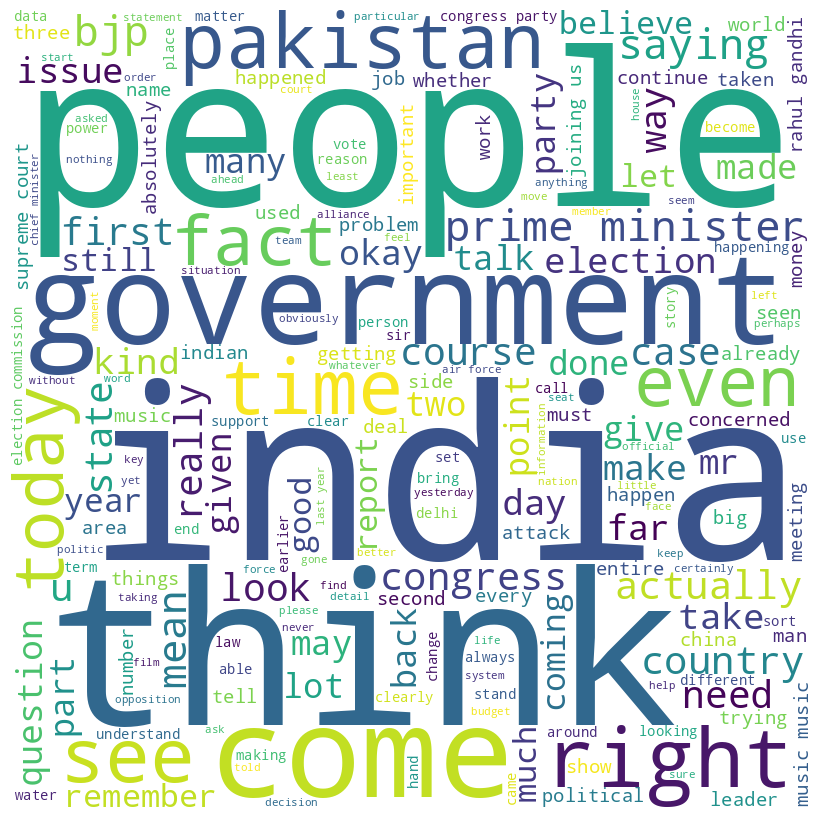

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Css/Filtered_labelled_ge_transcripts.csv')

df = remove_stopwords(df, 'transcripts')

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


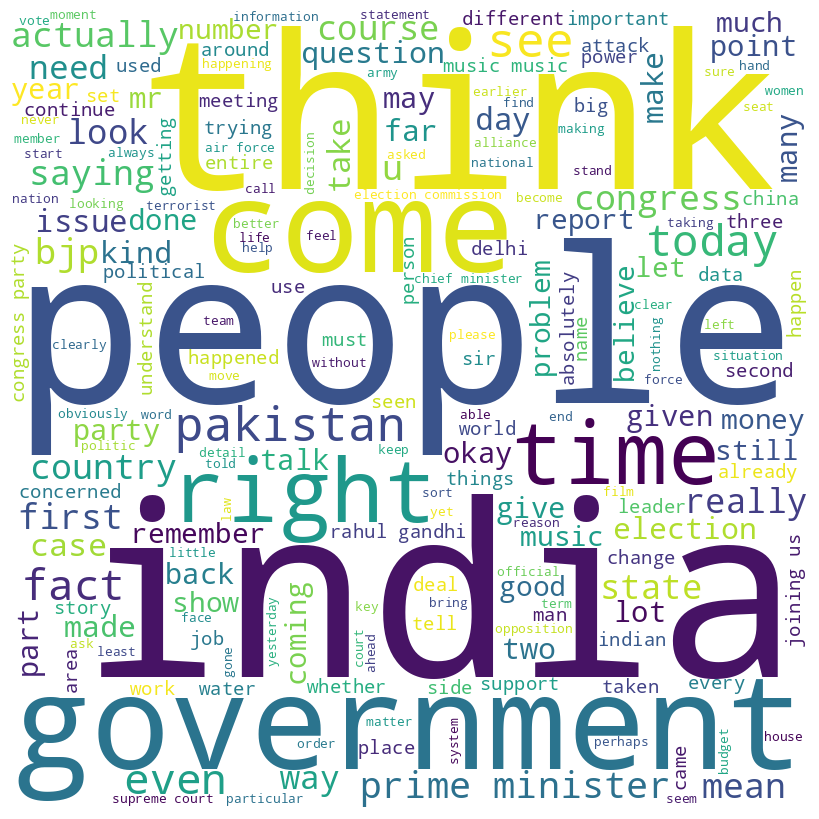

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Css/Filtered_labelled_state_transcripts.csv')

df = remove_stopwords(df, 'transcripts')

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()